# NLP and the Web

## Task 0 ~ 0P

__Task 0 is only relevant for the homework.__

##### a) Please enter your group number

14

_**Regarding types, documentation, and output:**_

_We tried to make the description of the parameters as clear as possible. However, if you believe that something is missing, please reach out to us in Moodle. We provide type hints for the function parameters and return values of the functions that you have to implement. These are suggestions only, and you may use different types if you prefer._

_Nevertheless, your code must use the provided method stubs and parameters. Furthermore, make sure that your code runs without errors and in a reasonable amount of time, for example by using "Kernel/Restart & Run All" before submitting._

_Please use comments where appropriate to help the tutors understand your code. This is especially important for the more extensive exercises later on. Finally, please pay attention to how you output the results. We highly recommend using `display(df)` for displaying data frames._

_**Please only modify the template in the specified markdown and code cells (e.g. YOUR CODE / ANSWER / IMPORTS HERE). Some cells are left blank on purpose. Please do not modify these cells, because they are used to autograde your submission. If these cells are modified, the automatic grading for your submission will fail and we might deduct points. Please do not modify the cells containing public and private tests. If you want to do your own tests, please use the code cell containing your code solution (YOUR CODE HERE).**_

---

# Home Exercise 1

__There was an issue when merging groups. Please check your group (see announcement on Moodle)!__

### Preparation
Please first install the required libraries for this programming exercise (according to the [requirement.txt](https://moodle.informatik.tu-darmstadt.de/mod/resource/view.php?id=52817)). It is suggested to follow [Practice Class Introduction](https://moodle.informatik.tu-darmstadt.de/pluginfile.php/239168/mod_resource/content/2/nlp4web_exercise__0_intro.pdf) Slide 16 to create the required environment.

In [1]:
try:
    import sklearn, numpy, pandas
except ImportError:
    print("The python envirionment doesn't meet the requirements")
    raise
from typing import Dict, List, Tuple, Mapping

Tokenization, also known as word segmentation, is the task of splitting a stream of characters into a ordered list of semantically useful groups of characters such as words and punctuation (e.g. the sentence "The cat sat on the mat." consists of tokens "Tqqqqqqqqqqqqqqqqqqqqqq";", "!") is encountered. Tokenization is a vital part of the NLP pipeline as it enables downstream linguistic analysis of text (e.g. how many nouns are in the text ?).

For the entirety of this exercise you are allowed to use [python standard library](https://docs.python.org/3.10/library/), numpy, pandas and scikit-learn. You are explicitely prohibited from using spacy in any of these tasks.

## Task 1 - 5 points

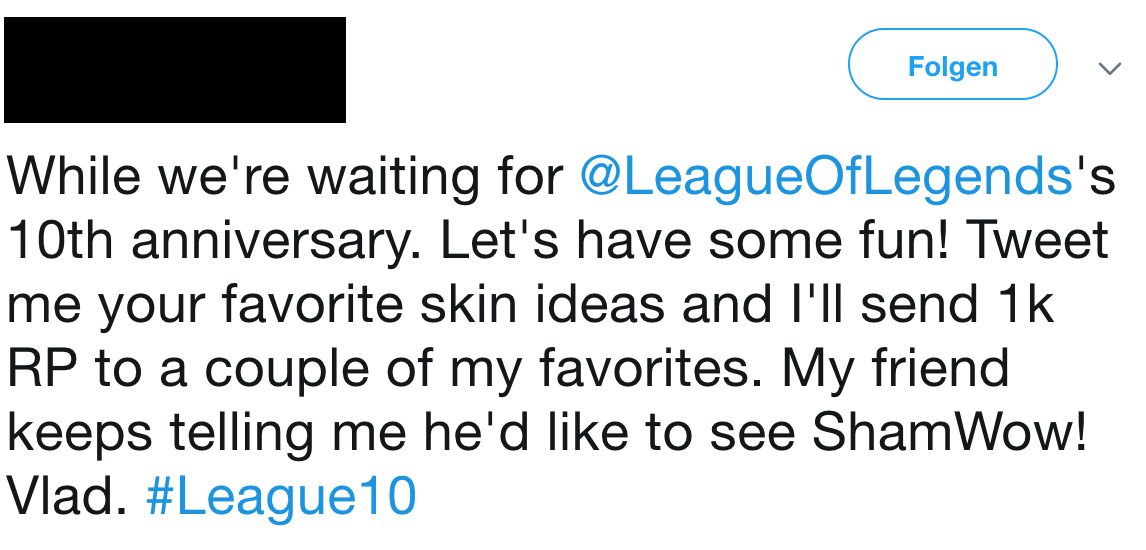

Please don't perform pre-processing other than what is explicitly required (e.g. no lower-casing).

##### a) Implement the method `word_tokenize` to tokenize an input string. Apply it to the above tweet and print the tokenized result. <font color="black">__(2 points)__</font>
<i>Make sure that punctuation like '.', '!' and ';' are returned as separate tokens! </i>

In [2]:
tweet = "    While we're waiting for @LeagueOfLegends's 10th anniversary. Let's have some fun! Tweet me your favorite skin ideas and I'll send 1k RP to a couple of my favorites. My friend keeps telling me he'd like to see ShamWow! Vlad. #League10    "
def word_tokenize(text: str) -> List[str]:
    """
    Segments a stream of characters into tokens
    
    Example: "The cat sat on the mat" -> ["The", "cat", "sat", "on", "the", "mat"]
    :param text: String that should be tokenized
    :return: List of token strings
    """
    import re
    tokens_list = re.findall(r'\b\w+\b|[.,;!]', text)
    return tokens_list

In [3]:
# Test
assert 'waiting' in word_tokenize(tweet)
assert word_tokenize("Natural Language Processing!") == ["Natural", "Language", "Processing", "!"]
assert 'ShamWow' in word_tokenize(tweet)
assert 'RP' in word_tokenize(tweet)

In [4]:
# Test
assert 'While' in word_tokenize(tweet)

##### b) Implement the method `ret_token_length`. Returns a list of all tokens and their length. Each token must only be printed once. <font color="black">__(1 point)__</font>

In [5]:
def ret_token_length(text: str) -> List[Tuple[str,int]]:
    """
    implement a method,which return a list of all tokens and their length. Each token must only be printed once.
    base on the funtion <word_tokenize> you write before
    
    Example: ret_token_length(tweet) -> [...("waiting",7)...]
    :param text: String that will be analysed
    :return: list[tuplen(token<type:string>,length of token<type:int>)]
    """
    result = [] 
    # YOUR CODE HERE
    result = [(token,len(token)) for token in word_tokenize(text)]
    return result

In [6]:
# Test
test_ret = ret_token_length(tweet)
assert ("waiting",7) in test_ret
assert ("ShamWow", 7) in test_ret
assert ("1k", 2) in test_ret
assert ("Natural", 7) in ret_token_length("Natural Language Processing!")
assert ("!", 1) in test_ret

##### c) Implement the method `build_dictionary4token`. Return a dictionary, key is  tokens and the value is their counts of occurance in the sentence. For example: `{"10th": 1}`. <font color="black">__(1 point)__</font>

In [7]:
def build_dictionary4token(text: str) -> Dict[str,int]:
    """
    Implement a method, key is tokens and the value is their counts of occurance in the sentence. 
    base on the funtion <word_tokenize> you write before
    
    Example: build_dictionary4token("The cat sat on the mat") -> {'the': 1, 'cat': 1, 'The': 1, 'on': 1, 'mat': 1, 'sat': 1}
    :param text: String that needs to be analysed
    :return: dictionary{token:frequency} i.e. dict[str, int]
    """
    result = {}  # e.g result = {...,"10th":1,...}
    # YOUR CODE HERE
    result = {token:word_tokenize(text).count(token) for token in word_tokenize(text)}
    return result

In [8]:
# Test 
test_sentences = ["The red car is parking behind the black car", "The tall man is standing beside the short man"]
assert build_dictionary4token(tweet)["10th"] == 1 
assert build_dictionary4token(tweet)["!"] == 2
assert build_dictionary4token(test_sentences[0]) == {"The": 1, "red": 1, "car": 2, "is": 1, "parking": 1, "behind": 1, "the": 1, "black": 1}
assert build_dictionary4token(test_sentences[1])['man'] == 2
assert build_dictionary4token(test_sentences[1])['the'] == 1

##### d) Name one example from the tweet above where your tokenizer is insufficient (Where do you think the tokenizer failed, and how you would expect this example to be properly tokenized). <font color="black">__(1 point)__</font>


We think the ' chars are missing. For example, "I'm" should be tokenized as "I", "'" and "'m". "#" and "@" are also missing. We're also unsure how to proceed with special token categories like, in this case, twitter handles and hashtags, as they can be seen as a kind of name, but also as seperate tokes e.g. "@", "League", "Of" and "Legends".

## Task 2 - 5 points

In [9]:
sents = [["the", "charges", "were", "announced", "by", "President", "Trump"],
         ["be", "thoughtful", "kind", "and", "mindful"],
         ["you", "will", "never", "have", "this", "day", "again"],
         ["unexpressed", "emotions", "will", "never", "die"]]

Given these 4 sentences, write a script to:

##### a) Implement the method `calculate_number`. Calculate the number of words in specified sentence (from sents given above, pay attention to the format of output sentence). <font color="black">__(1 point)__</font>

In [10]:
def calculate_number(number: int) -> str:
    """
    implement a method to calculate the number of words in specified sentence(sentences is sents)
    
    Example: calculate_number(2) -> "Sentence "be thoughtful kind and mindful" contains 5 words"
    :param number(from 1 to 4): which sentence(from sents) you want to calculate the number of words
    :return string: "Sentence "XXX" contains X words"
    """
    result =""
    result = "Sentence \""+  ' '.join(sents[number-1]) +"\" contains " +str(len(sents[number-1])) + " words"
    return result

In [11]:
# Test
assert calculate_number(2) == 'Sentence "be thoughtful kind and mindful" contains 5 words'

##### b) Implement the method `cal_num_word`. Calculate the total number of all words and the number of sentence of the given list, which consists of sentences (e.g. sents). <font color="black">__(1 point)__</font>

In [12]:
def cal_num_word(sentences: List[List[str]]) -> str:
    """
    Implement a method  to calculate the number of words in given list of sentence(e.g. sents)
    
    Example: cal_num_word(sents) -> "The total number of words of all 4 sentences is 24"
    :param list(consists of sentences): [["word_1 of sentence 1", "word_2 of sentence 1"...],..]
    :return string: "The total number of words of all X sentences is X"
    """
    result = ""
    result = "The total number of words of all " +str(len(sentences)) + " sentences is " + str(sum([len(sentence) for sentence in sentences]))
    return result

In [13]:
# Test
assert cal_num_word(sents) == 'The total number of words of all 4 sentences is 24'

##### c) Implement the method `cal_num_characters`. Calculate total number of characters in given list of sentences. <font color="black">__(2 points)__</font>

In [14]:
def cal_num_characters(sentences: List[List[str]]) -> str:
    """
    implement a method to calculate the number of characters in specified sentence
    
    Example: cal_num_chara(sents) -> "The total number of letters is 124"
    :param list(consists of sentences): [["word_1 of sentence 1", "word_2 of sentence 1"...],..]
    :return string: "The total number of letters is *."
    """
    result = ""
    # YOUR CODE HERE
    sum = 0
    for sentence in sentences:
        for words in sentence:
            for chars in words:
                sum += len(chars)
    result = "The total number of letters is " + str(sum) + "."
    return result

In [15]:
# Test
assert cal_num_characters(sents) == 'The total number of letters is 124.'


##### d) Implement the method `sentences_combine`. Convert each sentence to a string. Words should be separated by a hyphen (-) and lower-cased (e.g. "natural-language-processing"). <font color="black">__(1 point)__</font>

In [16]:
def sentences_combine(sentences: List[List[str]]) -> List[str]:
    """
    Implement a method: convert each sentence to a string. Words should be separated by a hyphen (-) and 
    lower-cased (e.g. "natural-language-processing").
    
    Example: sentences_combine(sents) -> ['the-charges-were-announced-by-president-trump',
                                          'be-thoughtful-kind-and-mindful',
                                          'you-will-never-have-this-day-again',
                                          'unexpressed-emotions-will-never-die']
    :param list(consists of sentences): [["word_1 of sentence 1", "word_2 of sentence 1"...],[..],..]
    :return list: ["<word_1 of sentence 1>-<word_2 of sentence 1>-...", \
                   "<word_1 of sentence 2>-<word_2 of sentence 2>-...",...]
    """
    result = []
    # YOUR CODE HERE
    result = ['-'.join(sentence).lower() for sentence in sentences]
    """
    Criteria: The sentences should be printed as above. 
    Use of `join()` and `lower()` is not required. 
    1 point
    """
    return result

In [17]:
# Test
assert sentences_combine(sents) == ['the-charges-were-announced-by-president-trump',
                                          'be-thoughtful-kind-and-mindful',
                                          'you-will-never-have-this-day-again',
                                          'unexpressed-emotions-will-never-die']

Language Modeling is one of the most crucial tasks in natural language processing. According to <a href="https://web.stanford.edu/~jurafsky/slp3/3.pdf">Jurafsky \& Martin, 2019</a> the simplest approach for a language model is assigning probabilities to  sentences and sequences of words, also known as n-grams, where n is a number. For instance, a bigram (2-gram) is a sequence of two words. In order to assign probabilities, we need to calculate the frequency of the bigram and divide it by the total number of bigrams in a corpus. Below you find a matrix of bigram counts for eight words (Taken from <a href="https://web.stanford.edu/~jurafsky/slp3/3.pdf">Jurafsky \& Martin, 2019</a>).
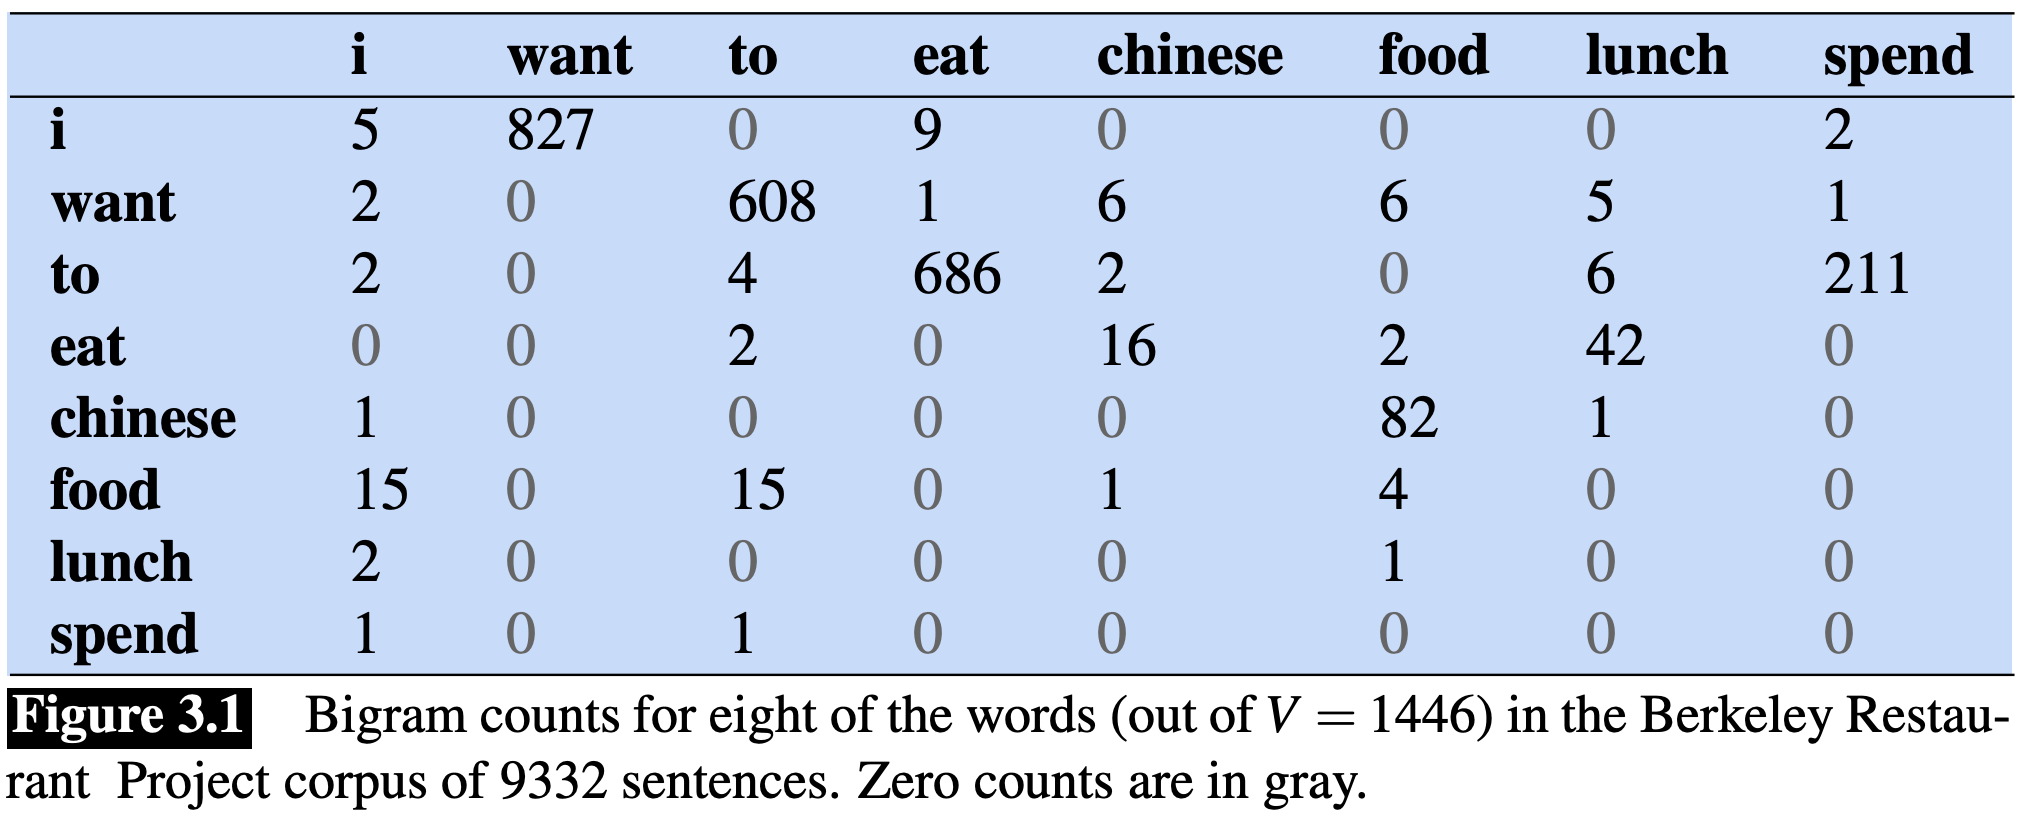


Using the knowledge presented in the last class, do the following exercises. Next to the standard python funtionality you are allowed to use the following libraries: <a href="https://pandas.pydata.org/docs/">pandas</a>, <a href="https://numpy.org/">numpy</a>, <a href="https://scikit-learn.org/stable/">scikit-learn</a>. We've already imported pandas and numpy for you.





In [18]:
# Imports
import pandas as pd

# here we've additionally imported the Counter
from collections import Counter

## Task 3 - 4 Points
Using the data structures presented in today’s class do the following tasks. You are allowed to use additional cells for further calculations.

For this task you have to use the dataset from the file yelp_polarity.txt. This file has two columns which are separated by '\t'. The first column contains reviews and the second column contains a sentiment label per review (0=negative, 1=positive).

##### a) Read the file yelp_polarity.txt into a dataframe and tokenize its sentences. Additionally, you should remove following punctuation `( '.', ',', ':', ';', '?', '!', '(', ')')` (you can disregard other punctuation) and lowercase all outputs. The processing shall be applied to each sentence in the dataframe. The result shall be appended as an additional column. <font color="black">__(1 point)__</font>
Feel free to use your function from task 1 and apply additional processing

In [19]:
import re
def initialize_data(file_name: str) -> pd.DataFrame:
   """
   implement a method
   1. firstly read dataframe from the file with file_name(i.e. "yelp_polarity.txt")
   2. Append the dataframe with an additional column(i.e. tokens}, which remove the punctuation `( '.', ',', ':', ';', '?', '!', '(', ')')` \
      and lowercase all outputs.

   Example: initialize_data("yelp_polarity.txt"): -> pd.DataFrame(columns=[0, 1, "tokens"])
   :param file_name: "yelp_polarity.txt"
   :return pd.DataFrame(pd.DataFrame.columns=[0, 1, "tokens"])
   """
   dataframe = pd.DataFrame([])
   # YOUR CODE HERE
   file = open(file_name, 'r')
   dataframe = pd.read_csv(file, sep='\t', header=None)
   dataframe.columns = [0, 1]
   dataframe['tokens'] = dataframe[0].apply(lambda x: re.sub(r'[.,:;?!()]+', '', x.lower()).split())   
   file.close()  # Cause I'm a pro :P
   return dataframe

In [20]:
# Test
assert (initialize_data("yelp_polarity.txt").columns == pd.Index([0, 1, 'tokens'], dtype='object')).all()
assert initialize_data("yelp_polarity.txt").iloc[13,0] == "I tried the Cape Cod ravoli, chicken,with cranberry...mmmm!"
assert initialize_data("yelp_polarity.txt")["tokens"][250] == ["owner's", 'are', 'really', 'great', 'people']
assert initialize_data("yelp_polarity.txt").iloc[420,1] == 1
assert initialize_data("yelp_polarity.txt").iloc[-72,0] == "We aren't ones to make a scene at restaurants but I just don't get it...definitely lost the love after this one!"

##### b) Implement the method `count_bigrams`. It shall calculate bigram counts for a series of tokenized texts. (Bigrams are sequences of two tokens). <font color="black">__(1 point)__</font>
__Hint__: You are allowed to use standard python libraries. Checkout the package <a href="https://docs.python.org/3/library/collections.html#module-collections">collections</a> and consider the suggested return type which may make your life easier.

In [21]:
def count_bigrams(tokenized_texts: pd.Series) -> Dict[Tuple[str,str],int]:
    """
    Counts bigrams in a list with tokenized texts
    @param tokenized_texts: series that contains tokenized texts
    @return: dict{...,(word_1 of bigram_1 , word_2 of bigram_2): counts,...}
    """
    result = Counter([])
    for text in tokenized_texts:
        # YOUR CODE HERE
        result.update(zip(text, text[1:]))
    # YOUR CODE HERE
    return result

In [22]:
# Test
assert count_bigrams(initialize_data("yelp_polarity.txt")['tokens'])[ ('the', 'service')] == 24
assert count_bigrams(initialize_data("yelp_polarity.txt")['tokens'])[('the', 'restaurant')] == 5
assert count_bigrams(initialize_data("yelp_polarity.txt")['tokens'])[('super', 'service')] == 0
assert count_bigrams(initialize_data("yelp_polarity.txt")['tokens'])[('of', 'the')] == 29
assert count_bigrams(initialize_data("yelp_polarity.txt")['tokens'])[('profound', 'deuchebaggery')] == 1


##### c)  Implement the method `most_common_bigram`. Store the 10 most frequent bigrams of the result of 3.b and their frequency in a list. <font color="black">__(1 point)__</font>

In [23]:
def most_common_bigram(input_count: Dict[Tuple[str,str],int]) -> List[Tuple[Tuple[str,str],int]]:
    """
    implement a method to store the 10 most frequent bigrams of the result of 3.b and their counts in a list.
    
    Example: most_common_bigram(count_bigrams(dataframe['tokens'])): -> [...(('the', 'service'), 24)...]
    :input dict({(str,str):int}) i.e. result of 3.b
    :return list [((word_1 of bigram_1 , word_2 of bigram_2), count),...]
    """
    result = []
    result = input_count.most_common(10)
    return result

In [24]:
# Test
dataframe = initialize_data("yelp_polarity.txt")
bigram_counts = count_bigrams(dataframe['tokens'])
temp_test = pd.Series([["these", "are", "his", "papers", "about", "combustion", "engine"],
                      ["if", "these", "are", "his", "papers", "about", "jet", "engine"],
                      ["and", "these", "are", "his", "papers", "about", "truck", "engine"],
                      ["these", "are", "his", "papers", "about", "four", "cylinder", "engine"]
                      ])
assert (('these', 'are'), 4) in most_common_bigram(count_bigrams(temp_test))
assert most_common_bigram(count_bigrams(temp_test))[3][0] == ('papers', 'about')
assert most_common_bigram(count_bigrams(temp_test))[2][1] == 4
assert (('jet', 'engine'), 1) in most_common_bigram(count_bigrams(temp_test))
assert (('the', 'service'), 24) in most_common_bigram(bigram_counts)

##### d) Implement the method `bigram_matrix`.  Return a bigram matrix (similar to Jurafsky & Martin above) from all tokens of the 10 most frequent bigrams. <font color="black">__(1 point)__</font>

In [25]:
def bigram_matrix(most_common: List[Tuple[Tuple[str, str],int]], bigram_counts:Dict[Tuple[str,str],int]) -> pd.DataFrame:
    """
    Prints a bigram matrix
    @param most_common list[tuple(tuple(str, str),count)] : most common bigrams (see task 3c)
    @param bigram_counts dict{tuple(str,str):count}: mapping with bigrams and their counts (see task 3b)
    :return pd.DataFrame: columns: most frequent 10 token, index: most frequent 10 token
    """
    matrix = pd.DataFrame([])
    # Extract the most common tokens
    tokens = list(set(word for bigram, _ in most_common for word in bigram))
    
    # Initialize the DataFrame with zeros
    matrix = pd.DataFrame(0, index=tokens, columns=tokens)
    
    # Fill in the counts for each bigram
    for bigram, count in bigram_counts.items():
        if bigram[0] in tokens and bigram[1] in tokens:
            matrix.loc[bigram[0], bigram[1]] = count
    return matrix
bigram_counts = count_bigrams(dataframe['tokens'])
temp_test = pd.Series([["these", "are", "his", "papers", "about", "combustion", "engine"],
                      ["if", "these", "are", "his", "papers", "about", "jet", "engine"],
                      ["and", "these", "are", "his", "papers", "about", "truck", "engine"],
                      ["these", "are", "his", "papers", "about", "four", "cylinder", "engine"]
                      ])
matrix = bigram_matrix(most_common_bigram(count_bigrams(temp_test)), count_bigrams(temp_test))
print(matrix)

            papers  jet  his  and  combustion  if  these  engine  about  are
papers           0    0    0    0           0   0      0       0      4    0
jet              0    0    0    0           0   0      0       1      0    0
his              4    0    0    0           0   0      0       0      0    0
and              0    0    0    0           0   0      1       0      0    0
combustion       0    0    0    0           0   0      0       1      0    0
if               0    0    0    0           0   0      1       0      0    0
these            0    0    0    0           0   0      0       0      0    4
engine           0    0    0    0           0   0      0       0      0    0
about            0    1    0    0           1   0      0       0      0    0
are              0    0    4    0           0   0      0       0      0    0


In [26]:
# Test
bigram_counts = count_bigrams(dataframe['tokens'])
temp_test = pd.Series([["these", "are", "his", "papers", "about", "combustion", "engine"],
                      ["if", "these", "are", "his", "papers", "about", "jet", "engine"],
                      ["and", "these", "are", "his", "papers", "about", "truck", "engine"],
                      ["these", "are", "his", "papers", "about", "four", "cylinder", "engine"]
                      ])
assert bigram_matrix(most_common_bigram(count_bigrams(temp_test)), count_bigrams(temp_test)).loc["his", "are"] == 0
assert bigram_matrix(most_common_bigram(count_bigrams(temp_test)), count_bigrams(temp_test)).loc["are", "his"] == 4
assert bigram_matrix(most_common_bigram(count_bigrams(temp_test)), count_bigrams(temp_test)).loc["jet", "engine"] == 1
assert bigram_matrix(most_common_bigram(bigram_counts ), bigram_counts).loc["i","was"] == 20
assert bigram_matrix(most_common_bigram(bigram_counts ), bigram_counts).loc["food","service"] == 1

## Task 4 - 6 Points
Solve the following tasks. Feel free to use code from Task 3:

##### a) Implement the method `get_top_k_bigrams`. It shall extract the top 20 most frequent bigrams and their from a given dataframe. Apply it to find the top 20 bigrams of all positive and negative documents in the file yelp_polarity.txt. (40 bigrams in total, 20 from positive and 20 from negative labled documents). <font color="black">__(2 points)__</font>

In [27]:
dataframe = initialize_data("yelp_polarity.txt")
def get_top_k_bigrams(dataframe: pd.DataFrame, label: int, k: int = 20) -> List:
    """
    Selects the top k bigrams from a list/ dataframe of bigrams for negative and positive documents
    @param dataframe: dataframe that contains bigrams, their counts and their polarity
    @param label: 0 to retrieve top-k negative documents
                  1 to retrieve top-k positive documents
    @param k: Number of top bigrams to be selected
    @return: List of tuples of top k bigrams and their counts  list[tuple(tuple(str, str), int)]
    """
    result = []
    # YOUR CODE HERE
    # raise NotImplementedError()
    filtered_df = dataframe[dataframe[1] == label]
    bigram_counts = count_bigrams(filtered_df['tokens'])
    result = bigram_counts.most_common(k)
    
    return result
print(get_top_k_bigrams(dataframe, 1, 20))

[(('this', 'place'), 37), (('and', 'the'), 24), (('the', 'food'), 23), (('was', 'very'), 17), (('food', 'was'), 17), (('on', 'the'), 16), (('and', 'i'), 16), (('it', 'was'), 16), (('the', 'best'), 16), (('this', 'is'), 15), (('service', 'was'), 14), (('of', 'the'), 14), (('a', 'great'), 13), (('place', 'is'), 12), (('in', 'the'), 11), (('is', 'a'), 11), (('for', 'the'), 11), (('the', 'service'), 11), (('very', 'good'), 10), (('i', 'had'), 10)]


In [28]:
# Test
dataframe = initialize_data("yelp_polarity.txt")
assert (('this', 'place'), 37) in get_top_k_bigrams(dataframe, 1, 20)
assert (('very', 'good'), 10) in get_top_k_bigrams(dataframe, 1, 20)
assert (('this', 'place'), 36) in get_top_k_bigrams(dataframe, 0, 20)
assert (('the', 'food'), 24) in get_top_k_bigrams(dataframe, 0, 20)
assert (('so', 'good'), 7) in get_top_k_bigrams(dataframe, 1, 40)
assert (('the', 'staff'), 9) in get_top_k_bigrams(dataframe, 1, 40)
assert (('not', 'good'), 7) in get_top_k_bigrams(dataframe, 0, 40)
assert (('to', 'the'), 8) in get_top_k_bigrams(dataframe, 0, 40)

##### b) Implement the method `get_probability_of_bigrams`.  It shall calculate the probability of the top 20 frequent bigrams (for positive and negative) from 2a). Follow the definition stated above and compute the probabilities based on the full dataset provided (i.e. based on all bigrams in all reviews). <font color="black">__(2 points)__</font>

In [29]:
bigram_counts = count_bigrams(dataframe['tokens'])
tmp = get_top_k_bigrams(dataframe, 1, 20)


def get_probability_of_bigrams(sum_bigrams: int, top_k: List[Tuple[Tuple[str,str],int]]) -> pd.DataFrame:
    """
    Calculates the probabilty of bigrams
    @param sum_bigrams: sum of all bigrams (including duplicates)
    @param top_k : list of top k bigrams (from 4.a task); list[tuple(tuple(str,str), int)]
    @return: DataFrame of bigrams and their probabilities
    """
    result = pd.DataFrame(top_k)
    result[1] = result[1] / sum_bigrams
    #print(result)
    # probs = []
    # for bigram, count in top_k:
    #     prob = count / sum_bigrams
    #     probs.append((bigram, prob))

    
    
    # YOUR CODE HERE
    #raise NotImplementedError()
    return result


In [31]:
# Test
bigram_counts = count_bigrams(dataframe['tokens'])
pos_bigrams = get_top_k_bigrams(dataframe, 1, 20)
neg_bigrams = get_top_k_bigrams(dataframe, 0, 20)
df_pos = get_probability_of_bigrams(sum(bigram_counts.values()), pos_bigrams)
df_neg = get_probability_of_bigrams(sum(bigram_counts.values()), neg_bigrams)

print(float(df_pos[df_pos[0]==("this", "place")][1].values))

assert abs(float(df_pos[df_pos[0]==("this", "place")][1].values) - 0.0037324725108443457) <1e-6



0.0037445602671794353


C:\Users\Bella\AppData\Local\Temp\ipykernel_13100\3694688315.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(float(df_pos[df_pos[0]==("this", "place")][1].values))
C:\Users\Bella\AppData\Local\Temp\ipykernel_13100\3694688315.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  assert abs(float(df_pos[df_pos[0]==("this", "place")][1].values) - 0.0037324725108443457) <1e-6


AssertionError: 

##### c) Write a script to save in a file the most probable bigrams of both classes and their probabilities separated by `tabs`. Write one file per polarity label (0, 1). <font color="black">__(1 point)__</font>

In [42]:
bigram_counts = count_bigrams(dataframe['tokens'])
# YOUR CODE HERE
# raise NotImplementedError()

sentiments = [0,1]
for sentiment in sentiments:
    sentiment_probs_df = get_probability_of_bigrams(sum(bigram_counts.values()), get_top_k_bigrams(dataframe, sentiment, 20))
    sentiment_prob_string = sentiment_probs_df.to_csv(index=False, header=False, sep='\t')
    output_file = open('{0}_probabilities.txt'.format(sentiment), 'a')
    output_file.write(sentiment_prob_string)
    output_file.close()

##### d) Compare the output of both classes and write an analysis of your observations in up to two sentences. Do those classes share some bigrams or are they totally different? <font color="black">__(1 point)__</font>

The classes share the top most common bigrams and their probabilities are very similar. Only at points 8 to 10 do small differences emerge that can be assigned to the "positive" and "negative" classes. However, this only becomes apparent on closer inspection. Analyzing the most frequent bigrams is probably not a good way to differentiate between such classes.

**Submission:**

Please upload your submission to Moodle before the next exercise session <font color="red">(Nov 15th, 23:59pm)</font>!

Submission format: `Group_XX_Exercise_X.zip`( e.g. for Group 29, you should submit file with name Group_29_Exercise_1.zip). 

Your submission should contain your filled out Jupyter notebook (naming schema: `Home_Exercise_X.ipynb`;i.e. remain the name "Home_Exercise_1.ipynb") and any auxiliar files that are necessary to run your code (e.g., the datasets provided by us).

Each submission must be handed in only once per group.